In [89]:
import scipy.linalg

__Simulation Initialization__

In [90]:
# Process noise
sigmaw = 1e-5

# Sensor noise covariance
sigmav = 0.1

# State equation matrices
A = np.array(1)
B = np.array(-1e-4)
C = np.array(0.7)
D = np.array(-0.01)

# True system state
xtrue = 0.5

# Initial state estimate
xhat = 0.5

# Kalman filter variance
sigmax = 0

# Initial driving input 
u = 1

maxiter = 1000

* In the actual filter, we save only the previous states. But for visulaization, all the states are stored
* Driving input and output are measured in an application. But here we are generating random values for testing the code

__Storage Variables__

In [91]:
xstore =  np.zeros((maxiter+1,np.size(xtrue)))
xstore[0] = xtrue
xhatstore = np.zeros((maxiter,np.size(xhat)))
sigmaxstore = np.zeros((maxiter,np.size(xhat**2)))

In [92]:
for k in range(maxiter):

    # ============== Step 1a ============== 
    # State Prediction Update

    xhat = A*xhat + B*u

    # ============== Step 1b ============== 
    # Error co-varaince time update

    sigmax = A*sigmax*A.T + sigmaw

    # +++++++++++++++++++++++++++++++++++++
    # All the below quantities are to be measured and fit

    # Random Input Generation
    u = np.random.rand(1)

    # Random process noise
    w = scipy.linalg.cholesky(sigmaw, lower = True)*np.random.rand(np.size(xtrue))

    # Random sensor noise
    v = scipy.linalg.cholesky(sigmaw, lower = True)*np.random.rand(np.size(C*xtrue))

    # Ouput Generation
    ytrue = C*xtrue + D*u + v

    # Future x bases on present u
    xtrue = A*xtrue + B*u + w

    # +++++++++++++++++++++++++++++++++++++


    # ============== Step 1c ============== 
    # Estimate sysem output
    yhat = C*xhat + D*u

    # ============== Step 2a ============== 
    # Kalman gain matrix calculation

    sigmay = C*sigmax*C.T + sigmav
    L = sigmax*C.T/sigmay


    # ============== Step 2b ============== 
    # State estimae measurement update
    xhat = xhat + L*(ytrue - yhat)

    # ============== Step 2c ============== 
    # Error co-variance measurement update

    sigmax = sigmax - L*sigmay*L.T

    xstore[k+1,:] = xtrue
    xhatstore[k,:] = xhat
    sigmaxstore[k,:] = sigmax



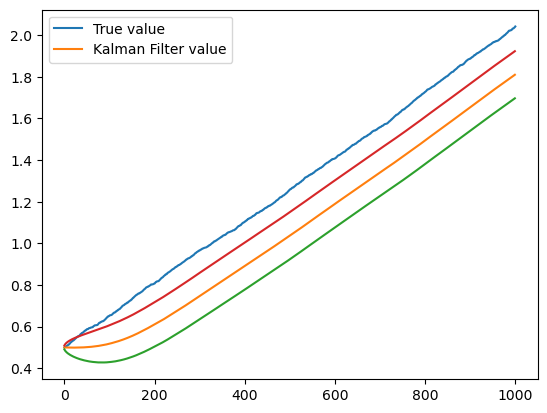

In [93]:
plt.plot(xstore)
plt.plot(xhatstore)
plt.plot(xhatstore - 3*np.sqrt(sigmaxstore))
plt.plot(xhatstore + 3*np.sqrt(sigmaxstore))
plt.legend(['True value', 'Kalman Filter value'])